 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns, using infer_datetime_format & parse_dates to convert dates to a DateTimeIndex & index_col to set index values as dates
# whale_df will be used to represent the variable name of the whale returns dataframe
whale_df = pd.read_csv("whale_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Using the .head() function for a quick visual representation of the top section of the whale dataframe
whale_df.head() 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls, the isnull() functinon detects missing values, combined with the sum() function outputs the numeric amount of nulls detected within the dataframe
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls, dropna() drops all null values in the given dataframe, inplace enforces the modifications are made to the dataframe
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns, using infer_datetime_format & parse_dates to convert dates to a DateTimeIndex & index_col to set index values as dates
algo_df = pd.read_csv("algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

In [7]:
# Using the .head() function for a quick visual representation of the top section of the algorithmic dataframe
# algo_df will be used to represent the variable name of the algortihmic trading returns dataframe
algo_df.head() 

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls, the isnull() functinon detects missing values, combined with the sum() function outputs the numeric amount
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls, dropna() drops all null values in the given dataframe, inplace enforces the modifications are made to the dataframe
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices, using infer_datetime_format & parse_dates to convert dates to a DateTimeIndex & index_col to set index values as dates
# sp_tsx_df will be used to represent the variable name of the S&P TSX returns dataframe
sp_tsx_df = pd.read_csv("sp_tsx_history.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

In [11]:
# Using the .head() function for a quick visual representation of the top section of the algorithmic dataframe
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [12]:
# Check Data Types, using the dtypes function which will output the data type of each column
sp_tsx_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types, using .str.replace function to remove any specified non numerical characters that are contained in the set ($ and ,)
# Regex is set to true so it is assumed as a regular expression
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '', regex=True)
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',', '', regex=True)
sp_tsx_df

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [14]:
# Calculate Daily Returns, using the .pct_change() function to output this information
# .pct_change() returns a dataFrame with the percentage difference between each row and the previous
# The .astype() function is used here as the close in this dataset is considered a float due to the decimals
sp_tsx_df = sp_tsx_df.astype(float).pct_change()
sp_tsx_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
# Drop nulls, dropna() drops all null values in the given dataframe, inplace enforces the modifications are made to the dataframe
# The isnull() functinon detects missing values, combined with the sum() function outputs the numeric amount
sp_tsx_df.dropna(inplace=True)
sp_tsx_df.isnull().sum()

Close    0
dtype: int64

In [16]:
# Rename `Close` Column to be specific to this portfolio, this is done using the .return() function
# The parameteres are set so the axis being modified is the columns and we are changing the Close column name to S&P TSX
sp_tsx_df.rename({'Close': 'S&P TSX'}, axis='columns',inplace=True)
sp_tsx_df

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
# The .concat() function is used to combined all 3 dataframes, with the parameters set to axis = columns and join = inner which will combine all
# records together seamlessly
# combined_df variable represents the data frame that consists of the whales algorithm and S&P dataframes 
combined_df = pd.concat([whale_df, algo_df,sp_tsx_df], axis = 'columns', join = 'inner')
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

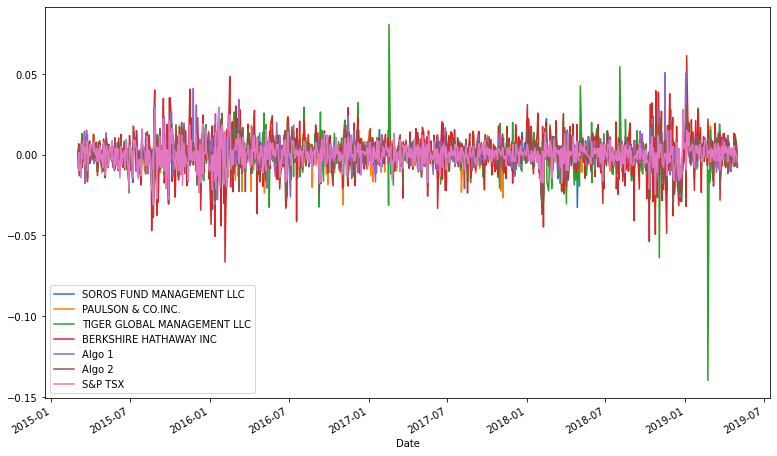

In [18]:
# Plot daily returns of all portfolios, using the .plot() function which generates a graph, the figsize parameter is used to adjust the size of the graph.
combined_df.plot(figsize=(13,8))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

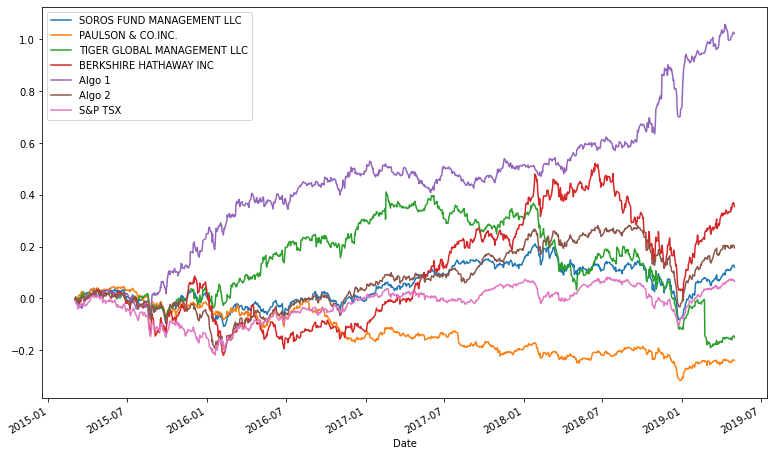

In [19]:
# Calculate cumulative returns of all portfolios, using the .cumprod() function which calculated the cummulate product of a dataframe
# combined_df_returns represents the cumulative returns across all the dataframes
combined_df_returns = (1 + combined_df).cumprod() - 1
# Plot cumulative returns, using the .plot() function which generates a graph, the figsize parameter is used to adjust the size of the graph.
combined_df_returns.plot(figsize=(13,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

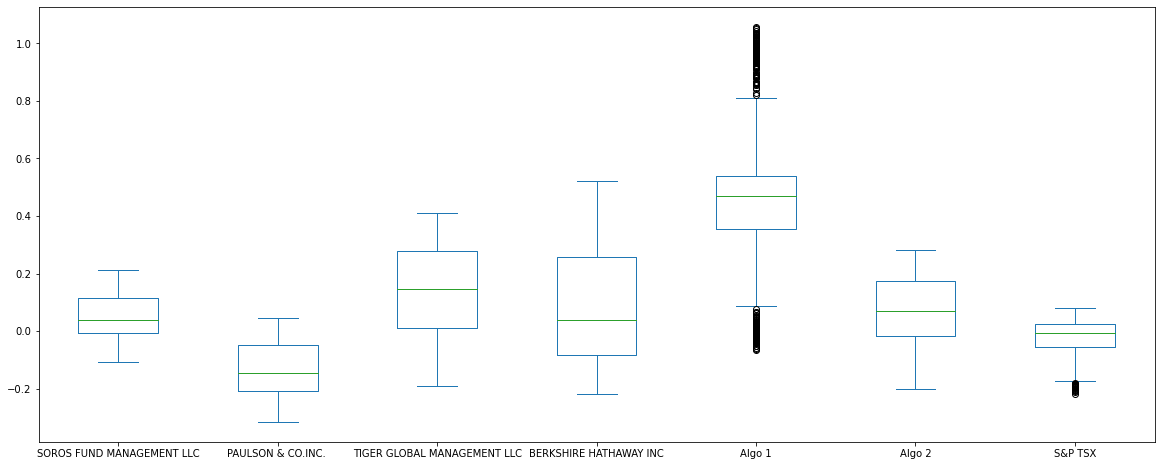

In [20]:
# Box plot to visually show risk, the .box() is added to the .plot() function to adjust the kid of graph to a box plot.
# combined_df_returns is used as it represents all the portfolios
combined_df_returns.plot.box(figsize=(20,8))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios, using the .std() function which calculates the standard deviation of a given dataframe
# combined_df_std is the variable used for the standard deviation of all the given dataframes
combined_df_std = combined_df_returns.std()
combined_df_std

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
S&P TSX                        0.064354
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [22]:
# Calculate the daily standard deviation of S&P TSX 60, using the .std() function
# sp_std represents the standard deviation of the S&P TSX
sp_std = combined_df["S&P TSX"].std()
# Determine which portfolios are riskier than the S&P TSX 60, if the standard deviation is greater than the S&P then it is considered more risky
# riskier is the variable that will represent the ouput of which portfolios are more risky than the S&P TSX
riskier = combined_df_std[(combined_df_std["S&P TSX"] < combined_df_std)]
riskier
# all of the portfolios are considered to be riskier than the S&P TSX

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
dtype: float64

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days), this is done by taking the standard deviation of the portfolios and multiplying
# the result by the square root of 252 (Since there are 252 days in a year that are considered trading days, this will be represnted in the
# variable annualized_std
annualized_std = combined_df_std*np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      1.115525
PAULSON & CO.INC.              1.440370
TIGER GLOBAL MANAGEMENT LLC    2.360896
BERKSHIRE HATHAWAY INC         3.125227
Algo 1                         4.108944
Algo 2                         1.851072
S&P TSX                        1.021582
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

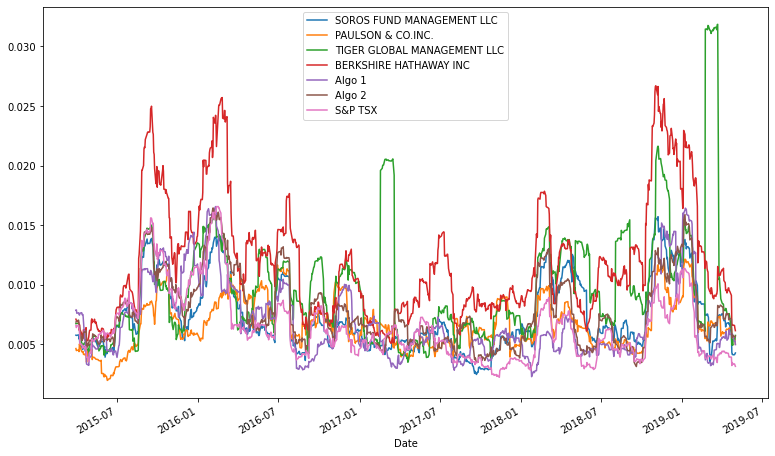

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# The .rolling() function is used with the window paramter set to 21 since we want the 21 day window
# rolling_std_21 is the variable that represents the rolling std for all portfolios with 21-day window
rolling_std_21 = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation, using the .plot() function which generates a graph, the figsize parameter is used to adjust the size of the graph.
rolling_std_21.plot(figsize = (13,8))

### Calculate and plot the correlation

<AxesSubplot:>

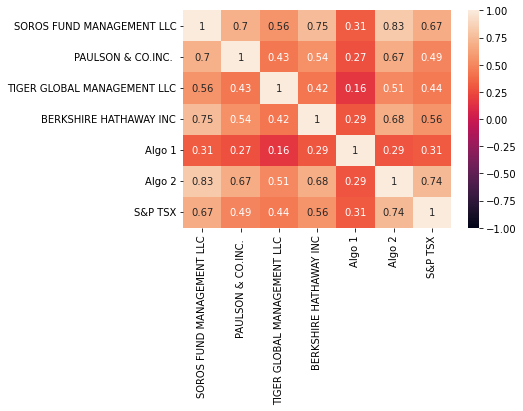

In [25]:
# Calculate the correlation, using the .corr() function which outputs the correlations within the given dataframe
# This information is stored in the variable correlation
correlation = combined_df.corr()

# Display de correlation matrix, using the sns.heatmap() function which will be able to give the following visual representation which inputed
# correlation information of a dataframe. 
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

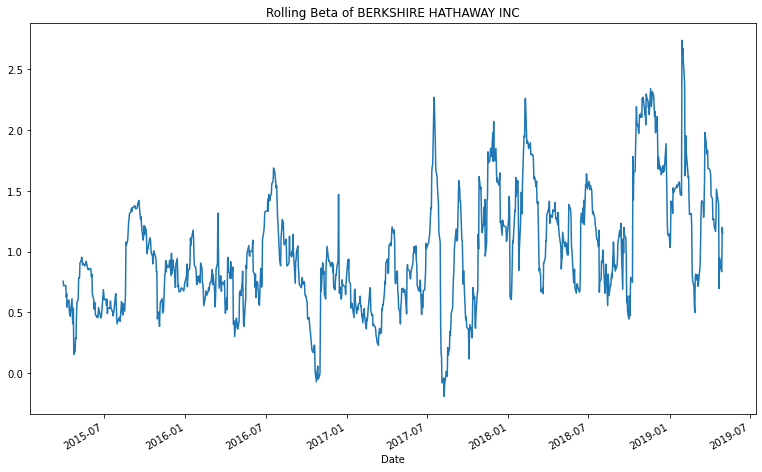

In [26]:
# Calculate covariance of a single portfolio, using the .cov() function which returns the covariance of a given dataset
# This information is stored in the variable berk_cov
berk_cov = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_df['S&P TSX'])

# Calculate variance of S&P TSX, using the .var() function which returns the variance of a given dataset
# This is stored in the variable sp_variable
sp_variance = combined_df['S&P TSX'].rolling(window=21).var()
# Computing beta, using the beta formula of covariance/variance. This is stored in the berk_beta variable
berk_beta = berk_cov / sp_variance
# Plot beta trend, using the .plot() function which generates a graph, the figsize parameter is used to adjust the size of the graph.
berk_beta.plot(title='Rolling Beta of BERKSHIRE HATHAWAY INC', figsize=(13,8))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [27]:
# Use `ewm` to calculate the rolling window, the paramater halflife is set to 21 days as that is what is desired, in combination with the .std() function
# This is stored in the combined_ewm variable
combined_ewm = combined_df.ewm(halflife=21).std()
combined_ewm.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios, this is stored in the variable sharpe_ratios
# This is calculated using the sharpe ratio formula.
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

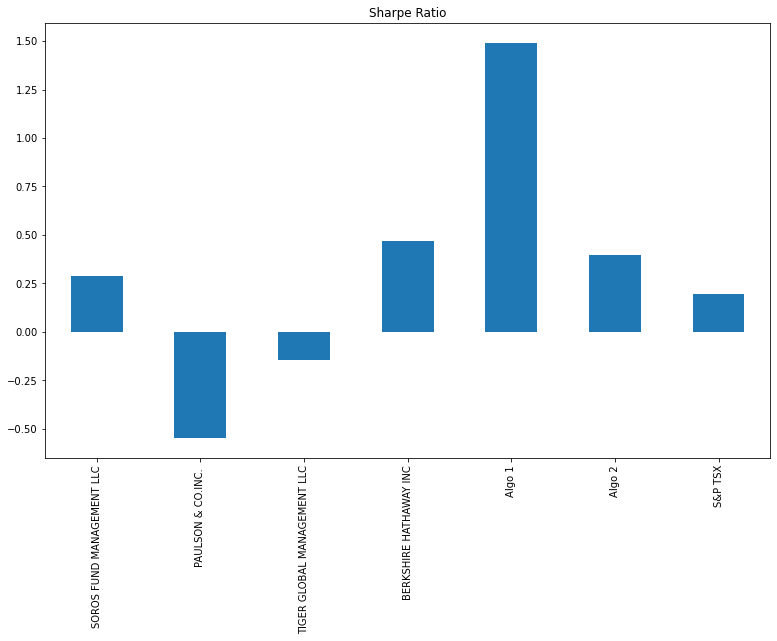

In [29]:
# Visualize the sharpe ratios as a bar plot, using the .plot() function which generates a graph, the figsize parameter is used to adjust the size of the graph.
# The paramater kind is set equal to bar as we want a bar graph visual representation
sharpe_ratios.plot(kind='bar', title='Sharpe Ratio',figsize=(13,8))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

--- The Algorithmic strategy 1 was able to outperform the S&P TSX 60, all the whale portfolios and even the second algorithmic strategy. The second algorthmic strategy outperformed the S&P TSX and all of the whale portfolios besides Berkshire Hathaway's.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock, using infer_datetime_format & parse_dates to convert dates to a DateTimeIndex & index_col to set index values as dates
# goog_df is the variable used to represent the chosen dataframe stock company: Google
shop_df = pd.read_csv("shop_historical.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df = shop_df.drop('Symbol',axis=1)
shop_df.head()   

,Close
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [32]:
# Reading data from 2nd stock, using infer_datetime_format & parse_dates to convert dates to a DateTimeIndex & index_col to set index values as dates
# amd_df is the variable used to represent the chosen dataframe stock company: AMD
otex_df = pd.read_csv("otex_historical.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df = otex_df.drop('Symbol',axis=1)
otex_df.head()

,Close
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [35]:
# Reading data from 3rd stock, using infer_datetime_format & parse_dates to convert dates to a DateTimeIndex & index_col to set index values as dates
# nvda_df is the variable used to represent the chosen dataframe stock company: NVIDIA
l_df = pd.read_csv("l_historical.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
l_df = l_df.drop('Symbol',axis=1)
l_df.head()

,Close
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [36]:
# Combine all stocks in a single DataFrame
# The .concat() function is used to combined all 4 of the stocks dataframes, with the parameters set to axis = columns and join = inner which will combine
# all records together seamlessly
custom_df = pd.concat([shop_df, otex_df, l_df], axis="columns", join="inner")
custom_df

,Close,Close,Close
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [37]:
# Reset Date index, using the .index.normalize() function
custom_df.index = custom_df.index.normalize()
custom_df

,Close,Close,Close
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [38]:
# Reorganize portfolio data by having a column per symbol
# This is done by creating a list of the names we want the Columns to be and using the .columns() function to set the name as the lists'
columns = ["SHOP", "OTEX", "L"]
custom_df.columns = columns
custom_df.head()

,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [39]:
# Calculate daily returns
# .pct_change() returns a dataFrame with the percentage difference between each row and the previous
custom_daily_returns = custom_df.pct_change()
# Drop NAs, using the .dropna() function
custom_daily_returns.dropna(inplace=True)
# Display sample data using the .head() function
custom_daily_returns.head()

,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Set weights, the weights are set to 1/3 as there are 3 stocks in this portfolio. This is stored in the weights variable
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
# The .dot() function calculates the returns of each stock in relation to the weight which is set to 1/5
# .pct_change() returns a dataFrame with the percentage difference between each row and the previous
# .dropna() used to ensure there is no null/empty values
portfolio = custom_df.dot(weights)
portfolio_returns = portfolio.pct_change()
portfolio_returns.dropna(inplace = True)

# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.008561
2018-01-04    0.009167
2018-01-05   -0.002271
2018-01-08    0.005395
2018-01-09   -0.004570
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# Join your returns DataFrame to the original returns DataFrame
# The .concat() function is used to combined all 4 of the stocks dataframes, with the parameters set to axis = columns and join = inner which will combine
# all records together seamlessly
# .rename() is used to rename the custom portfolio to MARCUS INC
all_df = pd.concat((portfolio_returns,combined_df), axis = 'columns', join = 'inner')
all_df.rename(columns={0: "MARCUS INC"}, inplace=True)
all_df.head()

,MARCUS INC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2018-01-03,0.008561,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.009167,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.002271,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.005395,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.004570,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs), the .dropna() function is used
# .isna().sum() is used to verify all null values are removed
all_df.dropna(inplace=True)
all_df.isna().sum()

MARCUS INC                     0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`
all_annualized_std = all_df.std() * np.sqrt(252)
all_annualized_std

MARCUS INC                     0.345776
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX                        0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

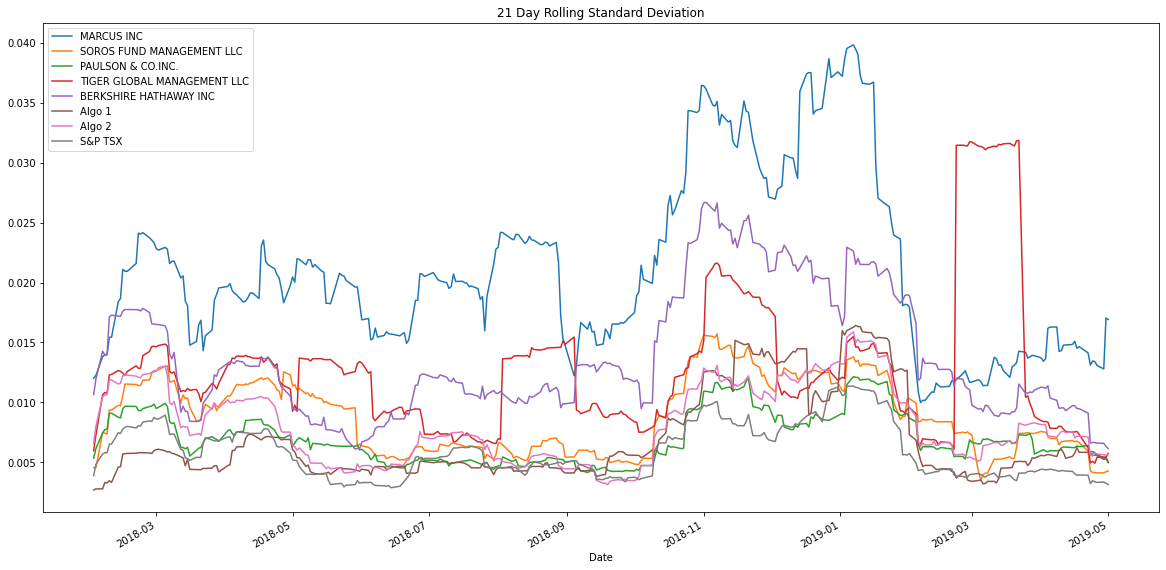

In [44]:
# Calculate rolling standard deviation, this is done by taking all the dataframes and using the .std() function in combination of .rolling() 
# to add the 21-day window parameter
all_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")
# Plot rolling standard deviation, using the .plot() function which generates a graph, the figsize parameter is used to adjust the size of the graph.

### Calculate and plot the correlation

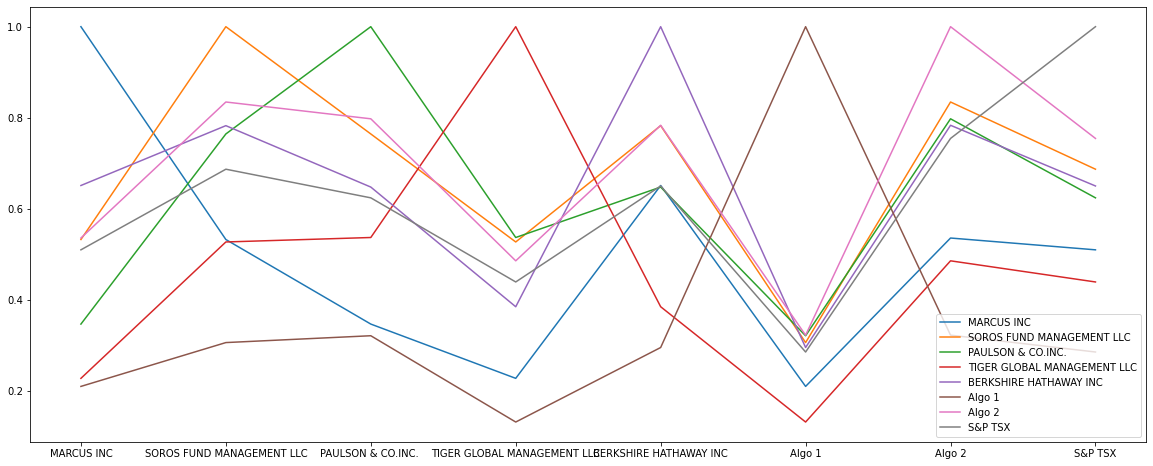

In [45]:
# Calculate and plot the correlation, using the .plot() function which generates a graph, the figsize parameter is used to adjust the size of the graph.
# using the .corr() function grabs the correlation within the dataset 
all_corr = all_df.corr().plot(figsize = (20,8))

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling Beta of MARCUS INC'}, xlabel='Date'>

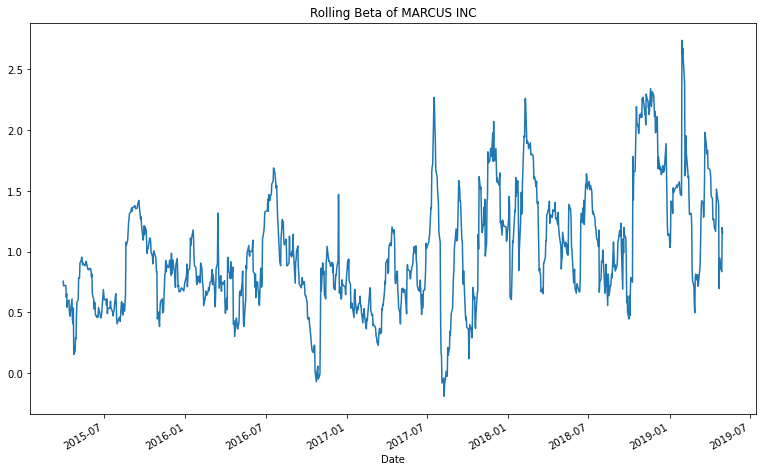

In [46]:
# Calculate and plot Beta, this section we use the same approach as in the previous section
marcus_cov = all_df['MARCUS INC'].rolling(window=60).cov(combined_df['S&P TSX'])

# Calculate variance of S&P TSX
variance = combined_df['S&P TSX'].rolling(window=60).var()
# Computing beta
marcus = marcus_cov / variance
# Plot beta trend, using the .plot() function which generates a graph, the figsize parameter is used to adjust the size of the graph.
berk_beta.plot(title='Rolling Beta of MARCUS INC', figsize=(13,8))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = (all_df.mean() * 252) / (all_df.std() * np.sqrt(252))
sharpe_ratio

MARCUS INC                     1.546162
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

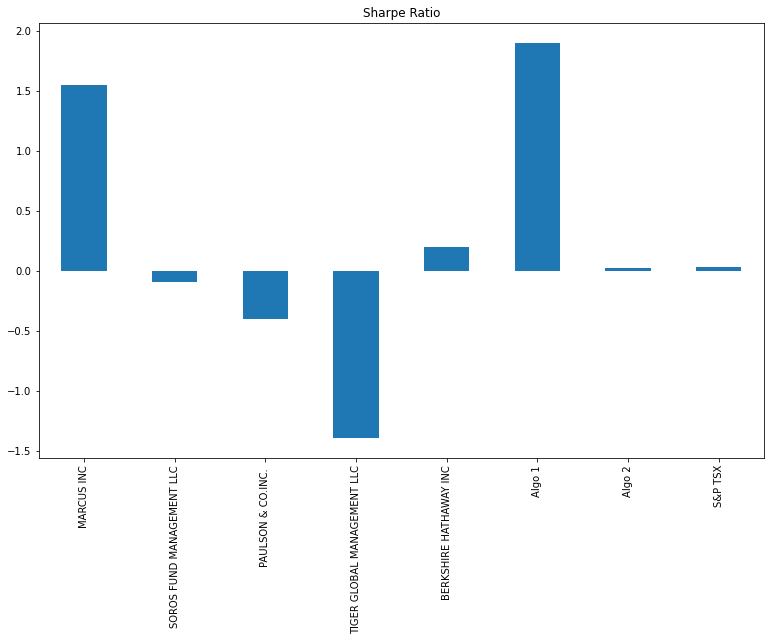

In [48]:
# Visualize the sharpe ratios as a bar plot, using the .plot() function which generates a graph, the figsize parameter is used to adjust the size of the graph.
sharpe_ratio.plot(kind='bar', title='Sharpe Ratio', figsize=(13,8))

### How does your portfolio do?

Write your answer here!

In [49]:
# The overall performance of the MARCUS INC portfolio is quite exceptional. This portfolio is much higher risk compared to the others compared to
# as shown when calculated the annualized standard deviation. It also doesn't have a strong correlation with the S&P which can also
# mean this portfolio is higher risk. It is also more volatile as proven with the rolling beta, however despite these higher risks
# this portfolio outperformed the rest and produced a sharpe ratio of 1.55. This portfolio did not outperform algo 2, however overall
# the MARCUS INC fund has created some exceptional higher risk gains